<a href="https://colab.research.google.com/github/Poorvinfi/Demo/blob/main/Placement_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/placement.csv')

In [6]:
df.head()

Unnamed: 0  cgpa     iq  placement
0           0   6.8  123.0          1
1           1   5.9  106.0          0
2           2   5.3  121.0          0
3           3   7.4  132.0          1
4           4   5.8  142.0          0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


We did this inorder to check if there are any null values and how is the data!

In [7]:
df.shape

(100, 4)

Steps:-
1. Preprocessing + EDA + Feature Selction
2. Extract Input and Output cols
3. Scale the values (Range of your data varies a lot so you bring them within a range eg: -1 to 1)
4. Cross Validation (Train - Test Split)
5. Train the model using training set
6. Evaluate the model/model selection
7. Deploy the model (Integrate in a website & that website will be deployed on server)




---



STEP 1:
Here Preprocessing requires just one step: Removing this Unnamed Column (which is unnecesary)

In [9]:
df = df.iloc[:,1:]

In [10]:
df.head()

cgpa     iq  placement
0   6.8  123.0          1
1   5.9  106.0          0
2   5.3  121.0          0
3   7.4  132.0          1
4   5.8  142.0          0

Now, EDA.
*we'll use a graph to see the data trends using MATPLOTLIB library of Python*

In [13]:
import matplotlib.pyplot as plt

We will use a scatter plot with- (x-axis=cgpa) &  (y-axis=iq)
This converts 2 values in one data point.

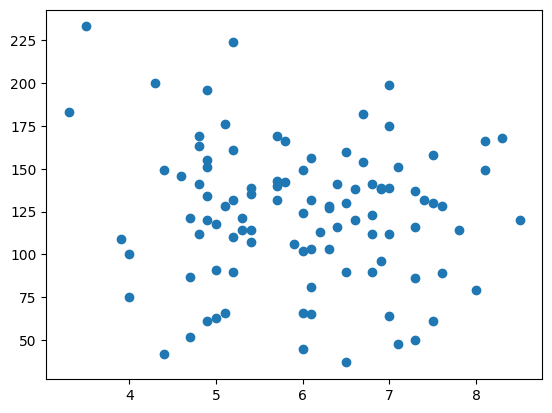

In [18]:
plt.scatter(df['cgpa'],df['iq'])




But, Inorder to see results here itself, we can highlight the placement positive data points, using *c=df['placement']*  in the above plotting code itself.



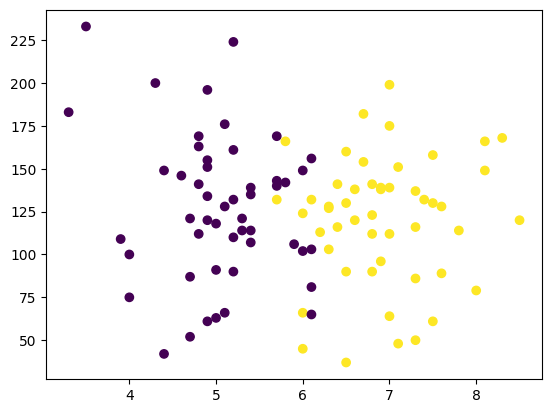

In [19]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])



---



Great, we have our data ready now! Now we have to build a model, which can learn the hidden patterns from this data.
We'll use LOGISTIC REGRESSION.

STEP 2: Extracting Input and Output Coln

Independent Variable- iq & cgpa

Dependent Variable- placement

In [21]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [23]:
X

cgpa     iq
0    6.8  123.0
1    5.9  106.0
2    5.3  121.0
3    7.4  132.0
4    5.8  142.0
..   ...    ...
95   4.3  200.0
96   4.4   42.0
97   6.7  182.0
98   6.3  103.0
99   6.2  113.0

[100 rows x 2 columns]

In [24]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [25]:
y.shape

(100,)

In [26]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

In [30]:
X_train

cgpa     iq
26   7.0  199.0
72   7.3  116.0
37   8.1  149.0
16   5.2  224.0
43   6.8  141.0
..   ...    ...
14   6.1  103.0
98   6.3  103.0
44   7.5   61.0
29   7.0  112.0
99   6.2  113.0

[90 rows x 2 columns]

In [31]:
X_test

cgpa     iq
74   6.7  154.0
4    5.8  142.0
65   8.1  166.0
70   6.3  127.0
69   8.5  120.0
88   4.4  149.0
52   7.0  175.0
0    6.8  123.0
45   6.0   66.0
48   6.6  138.0

In [32]:
y_train

26    1
72    1
37    1
16    0
43    1
     ..
14    0
98    1
44    1
29    1
99    1
Name: placement, Length: 90, dtype: int64

In [33]:
y_test

74    1
4     0
65    1
70    1
69    1
88    0
52    1
0     1
45    1
48    1
Name: placement, dtype: int64

We need to scale now:

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()

In [36]:
X_train = scaler.fit_transform(X_train)

In [37]:
X_train

array([[ 0.96246753,  1.8946164 ],
       [ 1.23009496, -0.1529508 ],
       [ 1.9437681 ,  0.66114218],
       [-0.64329704,  2.51135351],
       [ 0.78404924,  0.46378631],
       [ 0.33800353,  0.14308301],
       [ 0.15958524,  0.83382857],
       [ 0.96246753,  0.41444734],
       [-1.71380675, -1.16439966],
       [ 0.78404924, -0.7943574 ],
       [ 1.23009496, -0.89303534],
       [-0.64329704, -0.7943574 ],
       [ 1.49772239, -0.81902688],
       [ 0.15958524, -1.41109451],
       [-1.1785519 ,  0.58713373],
       [-1.71380675, -0.54766255],
       [ 0.87325839,  0.38977785],
       [ 0.15958524, -1.01638276],
       [-0.10804218,  1.08052342],
       [ 1.23009496,  0.36510837],
       [ 0.96246753, -1.43576399],
       [ 1.05167667,  0.71048115],
       [ 1.40851324,  0.88316754],
       [ 0.87325839, -0.64634049],
       [ 1.67614067, -0.20228977],
       [-2.33827075,  1.49990465],
       [ 1.23009496, -1.78113677],
       [ 0.0703761 ,  0.66114218],
       [-0.91092447,

In [38]:
X_test = scaler.fit_transform(X_test)

In [39]:
X_test

array([[ 0.07304185,  0.62254302],
       [-0.74867895,  0.20751434],
       [ 1.35127421,  1.0375717 ],
       [-0.2921674 , -0.31127151],
       [ 1.71648345, -0.55337157],
       [-2.02691131,  0.4496144 ],
       [ 0.34694878,  1.3488432 ],
       [ 0.16434416, -0.4496144 ],
       [-0.56607433, -2.42100062],
       [-0.01826046,  0.06917145]])



---



Step 3: MODEL TRAINING

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
clf = LogisticRegression() #clf=Classifier

In [42]:
clf.fit(X_train,y_train) #model training

LogisticRegression()

In [44]:
y_pred = clf.predict(X_test)

In [45]:
y_pred

array([0, 0, 1, 0, 1, 0, 1, 1, 0, 0])

We'll check the Accuracy now:

In [46]:
from sklearn.metrics import accuracy_score

In [47]:
accuracy_score(y_test,y_pred)

0.6

Let's plot the decision boundary.

Decisiom Boundary: Visualising the patterns caught in data by our model.

In [48]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

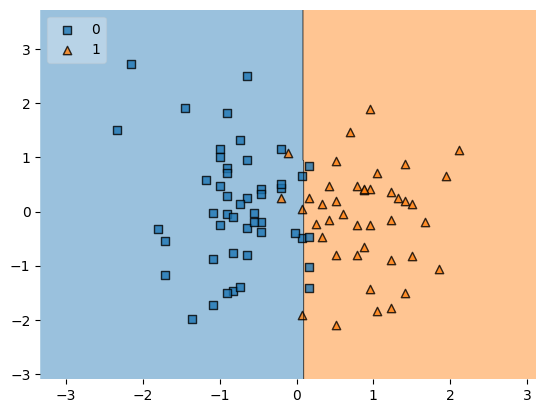

In [50]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)



---



Exporting the model through pickel

In [51]:
import pickle

In [52]:
pickle.dump(clf,open('model.pkl','wb'))